# Q-learning using tables
##### Authors: Eirik Fagtun Kjærnli and Fabian Dietrichson

## Welcome 
This workshop is structured such that for each cell, you will write your code own code and the code will then be asserted in the next cell. The assertion cell is marked "# Do not edit - Assertion cell #".

The code should be written between "Write code below" and "Write code above". If your code do not pass the assertion, you will have to rewrite your code before continuing.

### Task:
Click on the cell below, and run it to import the necessary libaries
Hot key to run a cell: CTRL + ENTER

In [1]:
def multiply_input_by_2(a_variabel):

    "Write code below" 
    result = a_variabel * 2
    
    "Write code above" 
    
    return result

In [2]:
# Do not edit - Assertion cell #
assert(multiply_input_by_2(10) == 20), "Your method did not multiple the input by 2"
print("Great, you correctly implemented the method!")

Great, you correctly implemented the method!


## Import of neccesary packages
To implement the native Q-learning algorithm and use it in a environment, we just need two additional packages.

_Numpy_
- Numpy adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. We could do this workshop using native Python arrays and built-in methods, however using Numpy simplifies the process. 
- To simply how we call the methods in the package, we use the "as np" command. As a result, you can simply write np.zeros(2, 2) to create a numpy table with 2 rows and 2 columns, where all the cells are zero.

_OpenAI Gym_
- The Gym library is a collection of test problems — environments — that you can use to work out your reinforcement learning algorithms. This range from simple text problems, to complex physisical problems, to Atari video games. This has made OpenAI Gym the prefeered framework to learn and test Reinforcement learning algorithms.


### Task:
To import the necessary packages, simply run the cell below, and then run the assertion cell to verify that they have been imported correctly.

In [3]:
import numpy as np
import gym

In [4]:
# Do not edit - Assertion cell #
try:
    assert(gym)
    print("Great, the packages were imported correctly!")
except:
    print("You did not run the cell above, do this before you continue!")

Great, the packages were imported correctly!


## Introduce the game we are going to solve here

The environment we are going to use is a simple grid world, where the agent is controlling a taxi. The environment was introduced in [Dietterich2000] to illustrate some issues in hierarchical reinforcement learning. There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop the passenger off in another. You can read more about the environment here: https://gym.openai.com/envs/Taxi-v2/

### Task:
Create the environment variabel containing all necessary methods to run the Taxi-v2 game. <br>
_Tip: Just run the cell below_

In [5]:
environment_id = "Taxi-v2"
env = gym.make(environment_id)

In [6]:
# Do not edit - Assertion cell #
try:
    assert(env)
    print("You successfully created the environement {}".format(env.spec.id))
except:
    print("You create the environment incorrectly!")

You successfully created the environement Taxi-v2


## Build support methods for workshop
Before you can go on, the cell below must be run. These are methods used to verify your work, in additon to support function which will be used throughout the workshop. 

### Task
Do as you have done before, simply mark the cell below and press CTRL + Enter!

In [7]:
from IPython.display import clear_output
import gym
import os
import time
from copy import deepcopy
import seaborn as sb
import matplotlib.pyplot as plt

class TestEnvironment():
    
    def __init__(self):
        self.env = gym.make(environment_id)
        self.env.reset()
        
    def play(self, action):
        if not (0 <= int(action) <= 5):
            print("Action value must either be 0,1,2,3,4 or 5")
            return

        clear_output()
        _, reward, done, _ = self.env.step(action)
        self.env.render()
        print("Reward: ", reward)
        
        if(done):
            print("Game completed, resetting environment!")
            self.reset_env()
        
    def reset_env(self):
        self.env.reset()
        print("Environment has been reset")
        time.sleep(2)
        clear_output()

class MockData():
    def __init__(self):
        self.env = gym.make(environment_id)
        self.env.seed(10)
        
    def get_Q(self):
        Q = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        Q[0:2,0] = 10
        return Q
    
    def get_env(self):
        return self.env

def visualize_q_table():
    fig=plt.figure(figsize=(10, 10))
    heat_map = sb.heatmap(Q_trained)
    plt.show()

def plot_visualization(data):
    
    reward_list = data[0]
    iteration_list = data[1]
    epsilon_list = data[2]
    
    episodes = range(len(reward_list))
    
    plt.figure(figsize=(10,10))
    ax = plt.subplot(311)
    ax.set_title("Reward")
    ax = plt.plot(episodes, reward_list)

    ax = plt.subplot(312)
    ax.set_title("Iterations per episode")
    ax.plot(episodes, iteration_list)
    
    ax = plt.subplot(313)
    ax.set_title("Epsilon")
    ax.set_xlabel("Episodes")
    ax.plot(episodes, epsilon_list)
    
    plt.show()

def reset_env_and_update_params(env):
    done = False
    state = env.reset()
    iterations = 0
    total_reward = 0
    
    return state, done, iterations, total_reward

def render_performance(env, Q):
    iterations = 0
    total_reward = 0
    t_sleep = 1.2
    
    state = env.reset()
    env.render()
    time.sleep(t_sleep)
    clear_output()
    done = False

    while not done:
        action = np.argmax(Q[state,:]) 

        new_state, reward, done, _ = env.step(action)
        state =  new_state

        env.render()
        time.sleep(t_sleep)
        clear_output()
        
        iterations += 1
        total_reward += reward
        
        if (iterations >= 20): 
            done = True
            print("Agent did not complete the episode within 20 iterations, train your agent better!")
            return
    
    print("Your agent completed the task using {} iterations, \
          and got a total reward of {}".format(iterations, total_reward))
    
test_env = TestEnvironment()
current_path = os.path.dirname(os.path.realpath("__file__"))
mock = MockData()

In [8]:
# Do not edit - Assertion cell #
try:
    assert(mock)
    print("Great, the support methods were created!")
except:
    print("You did not run the cell above, do this before you continue!")

Great, the support methods were created!


## Experiment with environment
Before we start creating the Q-learning agent, we will explore the environment we are going to use. This is done using a support method we have created for you.

**How to play**
1. Simply input an action, e.g. the integer 1, where it is indicated in the cell below, and click CTRL + Enter. 
2. The game will reset when you have picked up and then dropped off the passenger at the indicated location.
3. If you would like to reset the test environment during the execution, run the cell which indicates this below. 

*Tip*: The bold colored letter shows where the passenger should be picked up, and the normal colored letter shows drop of spot.

**Possible actions**
0. Move down
1. Move up
2. Move right
3. Move left
4. Pick up passenger
5. Drop off passenger

### Task:
Play around with the environment to understand the rewards and how the game dynamics works. When you will confident, move on to the next cell.

In [9]:
# Run this to reset the environment
test_env.reset_env()

In [10]:
# Run this cell to play the game

# Input your action below
action = 0
# Input your action above

test_env.play(action)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Reward:  -1


## Discussion point
The game above is a simply environment, which is easy for humans to solve. However, if you were to use traditional programming, how would you solve it? 

### Task
Use 5 minutes in the group to come up with a strategy, and create a quick draft!

<img src="images/Discussion.jpg" alt="drawing" width="400" height="200"/>

# Q-learning

In Reinforcement learning an agent moves from a state $S_{t}$, to a new state $S_{t+1}$ by taking an action $A_{t}$, and recieving the reward $R_{t}$. The agent will repeat this prosess for a defined amount of iterations, and this process as a whole is known as an episode. The process is illustrated below. The goal of the Reinforcement learning agent is to maximize the total reward it is able to collect during an episode. To improve its performance, it learns from each state transition, i.e. move from $S_{t}$ to $S_{t+1}$. How it learns, is what seperates the different Reinforcement learning algorithms. 

<img src="images/Agent.png" alt="drawing" width="500" height="500"/>

In this notebook we will work with one of the most iconic Reinforcement learning algorihm in its simplest form, namely Q-learning using Q-tables. Q-tables referes to the fact that we are storing the agent knowledge of the best strategy in a table, i.e. the strategy which gives us the highest reward. The table can be thought of as the brain of the agent. In the table each row represents a state, and the columns represent the possible actions in that state. This will be explained further in the next section.

A Q-value is a measure of the total expected reward the agent will recieve if it chooses that action, and always picks the action with the highest Q-value in the suceeding states, using its current knowledge of the environment, i.e. the Q-table. Simply said, the higher the Q-value the better the agent believes the action is. 

The Q-learning algorithm is used to update the Q-values for a given action $A_{t}$ in the state $S_{t}$, and is updated after each iteration. The equation is shown below.

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow Q(s_{t}, a_{t}) + \alpha \ \big[r_{t} + \gamma \ \underset{a}{max} \  Q(s_{t+1},a) - Q(s_{t},a_{t})\big]
\end{equation}
$

A key point to note in this equation, is that we are updating the Q(s,a) by using the the highest Q-value in the next state, $S_{t+1}$. This value is unknown, and it is therefore just the agent estimate of that state. This makes it an optimization problem were we gradually correct each Q-value as we recieve an reward moving between the states.


This might seem daunting at first, however we will through this notebook break it into simple peices, which will hopefully, make it easier to grasp.

## Create the Q-table
The Q-table is the brain of agent, and stores the agent's current knowledge of the Q-values of each state. Each row represents a state, and the columns represents all possible actions in that state. As a result, our table will have the dimmensions, (rows=number of states, columns=number of actions). An illustration of the table is shown below, altough without the labels on the columns. 

<img src="images/Taxi_matrix_initial.png" alt="drawing" width="500" height="500"/>

### Task:
Create and return a Q-table using numpy, where each cell is initialized to zeros:
- Create the Q-table by using the numpy command: np.zeros(rows, columns). <br>
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html
- Use the following command to get the number of states in the environment:
    - env.observation_space.n
- Use the following command to get the number of possible actions. PS. all states have the same amount of actions.
    - env.action_space.n

In [11]:
def create_q_table(env):
    
    "Write code below" 
    action_size = env.action_space.n
    observation_size = env.observation_space.n
    
    Q_table = np.zeros([env.observation_space.n, env.action_space.n])
    
    "Write code above" 
    
    return Q_table

In [12]:
# Do not edit - Assertion cell #
assert(np.count_nonzero(mock.get_Q() == 0)), "All values in Q-table should be zero"
assert(mock.get_Q().shape == (mock.get_env().observation_space.n, mock.get_env().action_space.n)), \
"The dimensions are wrong"
print("The Q-table was correctly built! " +
      "It has {} rows, each representing a unique state, and {} columns, each representing an action for that state."\
      .format(mock.get_env().observation_space.n, mock.get_env().action_space.n))

The Q-table was correctly built! It has 500 rows, each representing a unique state, and 6 columns, each representing an action for that state.


## Select the best action
Before we begin implementing the Q-learning algorithm, we will implement a method which makes the agent pick the action with the highest Q-value, given a state.

### Task
Return the column index of the highest Q-value in the Q-table, given a state.
- Tip: Use the argmax function from the numpy library. <br> https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

In [13]:
def get_best_action(Q_table, state):
    
    "Write code below" 
    best_action =  np.argmax(Q_table[state,:]) 
    
    "Write code above"
    
    return best_action

In [14]:
# Do not edit - Assertion cell #
assert(get_best_action(mock.get_Q(), 1) == 0), "The method did not pick the action with the highest Q_value"
print("The best action for the test state was chosen, excellent!")

The best action for the test state was chosen, excellent!


## Select an action

When we create the Q-table all Q-values are set to zero. As we begin to move around the environment, it is that we end up in a loop having only explored a small part of the environment. This is a problem so big that is has its own name; the Exploration vs Exploiation dilemma!

One simply and highly solution is simply, and is used through 
The exploration vs. exploitation is a very effective method to ensure the agent explores a sufficent area of the state space, and avoid coverging to a local optima.

### Task:
Create method which picks a random action, IF a random value in the range [0,1] is less than epsilon, or ELSE picks the best action using the method we created earlier.   
- To pick a random action, use env.action_space.sample()
- To generate a random number with uniform probability in the range [0,1], use np.random.uniform()

In [15]:
def select_action(Q_table, state, epsilon):
    
    "Write code below"
    if epsilon > np.random.uniform():
        action = env.action_space.sample()
    else:
        action = get_best_action(Q_table, state)
    
    "Write code above"    
    
    return action

In [16]:
# Do not edit - Assertion cell #
assert(select_action(mock.get_Q(), 1, 0) == 0), \
"Method should always return the same value for this state, since epsilon is 0"
assert not (len(set([select_action(mock.get_Q(), 1, 1) for x in range(20)])) <= 2), \
"Method should not return identical values when a random action, should be chosen"
print("The correct actions were picked, great job!")

The correct actions were picked, great job!


## Gradually shift towards exploitation, and reduce exploration of state space
To make sure we are gradually moving from exploration to exploiation, we need to reduce the possibility of choosing a random action. In other words, we need to reduce Epsilon. This is done by multiplying it with a constant called epsilon decay.

### Task:
Create a method which reduces epsilon by multiplying itself with the the defined constant epsilon decay.

In [17]:
def update_epsilon(epsilon):
    epsilon_decay = 0.95
    
    "Write code below" 
    epsilon *= epsilon_decay
    "Write code above"
    
    return epsilon

In [18]:
# Do not edit - Assertion cell #
assert(update_epsilon(5) == 4.75), "Given an input of 5, the output should have been 4.75"
print("Epsilon was correctly updated!")

Epsilon was correctly updated!


 ## Find the highest Q_value for a given state

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow Q(s_{t}, a_{t}) + \alpha \ \big[r_{t} + \gamma \ {\color{red}{\underset{a}{max} \  Q(s_{t+1},a)}} - Q(s_{t},a_{t})\big]
\end{equation}
$ 

### Task

In [19]:
def find_highest_Q_value_in_state(Q_table, new_state):
    "Write code below"
    best_Q_value = np.max(Q_table[new_state,:])
    "Write code above"
    
    return best_Q_value

In [20]:
# Do not edit - Assertion cell #
assert(find_highest_Q_value_in_state(mock.get_Q(), 1) == 10), \
"The method did not pick the action with the highest Q_value"
print("Perfect, the method returned the highest Q-value for that state!")

Perfect, the method returned the highest Q-value for that state!


## Calculate error  in Q-value

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow Q(s_{t}, a_{t}) + \alpha \ \big[{\color{red}{r_{t} + \gamma \ \underset{a}{max} \  Q(s_{t+1},a) - Q(s_{t},a_{t})}}\big]
\end{equation}
$

Need to explain the discount factor

### Task:


In [21]:
def calculate_error_in_Q_value(Q_table, state, action, reward, new_state):
    
    discount_factor = 0.95
    
    "Write code below"
    highest_q_value_in_state = find_highest_Q_value_in_state(Q_table, new_state)
    
    error_in_Q_value = reward + discount_factor * highest_q_value_in_state - Q_table[state,action]
    
    "Write code above"
    
    return error_in_Q_value

In [22]:
# Do not edit - Assertion cell #
assert(calculate_error_in_Q_value(mock.get_Q(), 0, 0, 10, 1) == 9.5), \
"The method did not calculate the correct error value for the test sample"
print("The error in Q-value have been calculated correctly!")

The error in Q-value have been calculated correctly!


## Update Q-table

Finaly we can put it all together and end up with the final equation.

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow {\color{red}{Q(s_{t}, a_{t}) + \alpha \ \big[r_{t} + \gamma \ \underset{a}{max} \  Q(s_{t+1},a) - Q(s_{t},a_{t})\big]}}
\end{equation}
$

### Task
Create a method which either sets
 - The Q-value equal to the reward, if it was the final episode. (Done is true)
 - Else updates the Q by following the equation above

In [23]:
def update_q_table(Q_table, state, action, done, reward, new_state):
    
    learning_rate = 0.8
    
    "Write code below"
    if(done):
        Q_table[state, action] = reward
    else:
        Q_table[state, action] = Q_table[state, action] + \
        learning_rate * calculate_error_in_Q_value(Q_table, state, action, reward, new_state)
    "Write code above"
    
    return Q_table

In [24]:
# Do not edit - Assertion cell #
assert(update_q_table(mock.get_Q(), 2, 1, 1, 10, 3)[2,1] == 10), \
"The updated Q-value when simulation was done was incorrect"
assert(update_q_table(mock.get_Q(), 0, 0, 0, 10, 1)[0,0] == 17.6), \
"The updated Q-value when the episode was not done, was incorrect"
print("Q-tabel have been correctly updated!")

Q-tabel have been correctly updated!


## Take one step
Take all we have learnt until this point

### Task
    Chose action
    Make step
    Return result
    

In [25]:
def step(Q_table, env, state, epsilon):
    
    "Write code below"
    action = select_action(Q_table, state, epsilon)
    new_state, reward, done, _ = env.step(action)
    
    "Write code above"
    
    return action, reward, done, new_state

In [26]:
# Do not edit - Assertion cell #
mock_env1 = deepcopy(mock.get_env())
mock_env1.reset()
mock_env2 = deepcopy(mock_env1)

new_state, _, _, _ = mock_env1.step(0)
assert(step(mock.get_Q(), mock_env2, 0, 0) == (0, -1, False, new_state)), \
"Your environment did not return the correct values"
print("Your step method seems to function properly, good job!")

Your step method seems to function properly, good job!


## Create train method

Explain what an episode and iteration is
Explain code already writen

### Task

In [27]:
def train(env, num_episodes, max_iterations):
    done = False
    epsilon = 1
    reward_list, iterations_list, epsilon_list = [], [], []
    
    "Write code below"
    # Initialize Q-table
    Q_table = create_q_table(env)
    "Write code above"

    for episode in range(num_episodes):

        if (done and episode % 10 == 0): 
            print("Episode: {} | Iterations: {} | Total Reward: {}".format(episode, iterations, total_reward))
        
        state, done, iterations, total_reward = reset_env_and_update_params(env)
        
        "Write code below"
        # Update epsilon
        epsilon = update_epsilon(epsilon)
        
        "Write code above"
        
        while not done:
            
            "Write code below"
            
            # Take step
            action, reward, done, new_state = step(Q_table, env, state, epsilon)
                        
            # Update Q-table
            Q_table = update_q_table(Q_table, state, action, done, reward, new_state)
            
            # Set the new state as the current state
            state = new_state
            
            "Write code above"
            
            # Update episode information
            iterations += 1
            total_reward += reward
            
            # End episode if it has lasted for too many iterations
            if (iterations >= max_iterations): done = True

        reward_list.append(total_reward)
        iterations_list.append(iterations)
        epsilon_list.append(epsilon)
        
    return Q_table, (reward_list, iterations_list, epsilon_list)

## Create play method


### Task

In [28]:
def play(env, Q_table):
    
    state, done, iterations, total_reward = reset_env_and_update_params(env)

    while not done:

        "Write code below"
        # Take step
        action, reward, done, new_state = step(Q_table, env, state, 0)

        # Set the new state as the current state
        state = new_state

        "Write code above"

        # Update episode information
        iterations += 1
        total_reward += reward

        if (iterations >= 50): done = True
    
    print("Iterations: {} | Total Reward: {}".format(iterations, total_reward))

## Time to put our methods to use!

### Train agent

In [29]:
maximum_episodes = 0
maximum_iterations = 0

Q_table_trained, data = train(env, maximum_episodes, maximum_iterations)

### Plot key variables 

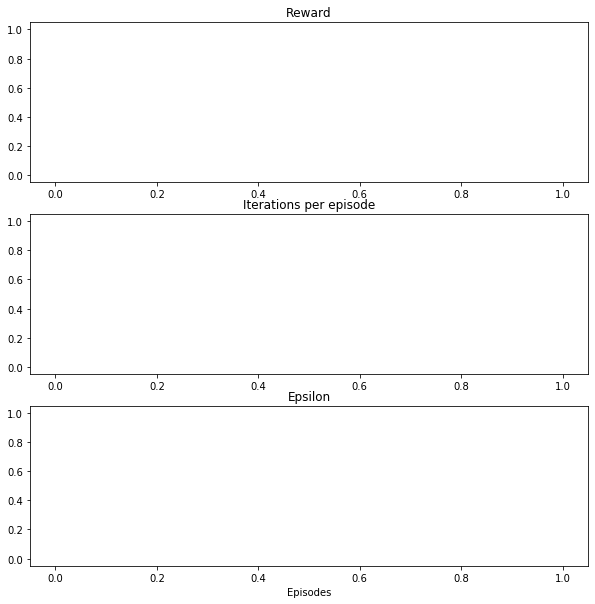

In [30]:
plot_visualization(data)

### Play a round

In [31]:
play(env, Q_table_trained)

Iterations: 50 | Total Reward: -50


### Visualize an episode

In [32]:
render_performance(env, Q_table_trained)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


KeyboardInterrupt: 